In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv('/content/musicdata.csv')

In [3]:
df.head()

,format,metric,year,number_of_records,value_actual
0,CD,Units,1973,1,NaN
1,CD,Units,1974,1,NaN
2,CD,Units,1975,1,NaN
3,CD,Units,1976,1,NaN
4,CD,Units,1977,1,NaN


In [4]:
df.describe()

,year,number_of_records,value_actual
count,3008.000000,3008.0,1351.000000
mean,1996.000000,1.0,781.291237
std,13.566915,0.0,2246.837672
min,1973.000000,1.0,-7.650944
25%,1984.000000,1.0,3.700228
50%,1996.000000,1.0,63.900000
75%,2008.000000,1.0,448.900000
max,2019.000000,1.0,19667.327786


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             3008 non-null   object 
 1   metric             3008 non-null   object 
 2   year               3008 non-null   int64  
 3   number_of_records  3008 non-null   int64  
 4   value_actual       1351 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 117.6+ KB


In [6]:
#What are our formats?
df.format.unique()

array(['CD', 'CD Single', 'Cassette', 'Cassette Single', 'LP/EP',
       'Vinyl Single', '8 - Track', 'Other Tapes',
       'Music Video (Physical)', 'DVD Audio', 'SACD', 'Download Single',
       'Download Album', 'Kiosk', 'Download Music Video',
       'Ringtones & Ringbacks', 'Paid Subscriptions',
       'Limited Tier Paid Subscription',
       'On-Demand Streaming (Ad-Supported)',
       'Other Ad-Supported Streaming', 'Other Digital',
       'Paid Subscription', 'SoundExchange Distributions',
       'Synchronization'], dtype=object)

In [12]:
#Let's single out the formats we care about in a new df
new_df = df.loc[df.format.isin(['CD', 'CD Single', 'Cassette', 'Cassette Single', 'LP/EP',
       'Vinyl Single', 'Download Single', 'Download Album', 'Paid Subscriptions',
       'Limited Tier Paid Subscription',
       'On-Demand Streaming (Ad-Supported)',
       'Other Ad-Supported Streaming','Paid Subscription'])]
new_df.head()

,format,metric,year,number_of_records,value_actual
0,CD,Units,1973,1,NaN
1,CD,Units,1974,1,NaN
2,CD,Units,1975,1,NaN
3,CD,Units,1976,1,NaN
4,CD,Units,1977,1,NaN


In [24]:
#time to clean up the df

new_df = new_df.drop(columns = ['number_of_records'])
new_df.value_actual = new_df.value_actual.fillna(0)
new_df.head()

,format,metric,year,value_actual
0,CD,Units,1973,0.0
1,CD,Units,1974,0.0
2,CD,Units,1975,0.0
3,CD,Units,1976,0.0
4,CD,Units,1977,0.0


In [25]:
new_df.format.unique()

array(['CD', 'CD Single', 'Cassette', 'Cassette Single', 'LP/EP',
       'Vinyl Single', 'Download Single', 'Download Album',
       'Paid Subscription', 'Limited Tier Paid Subscription',
       'On-Demand Streaming (Ad-Supported)',
       'Other Ad-Supported Streaming'], dtype=object)

In [29]:
#time to merge the entries to have a cleaner chart
replacement_dict = {
    'CD Single':'CD',
    'Cassette Single':'Cassette',
    'LP/EP':'Vinyl', 
    'Vinyl Single':'Vinyl',
    'Download Single':'Download',
    'Download Album': 'Download',
    'Paid Subscription':'Streaming',
    'Paid Subscription':'Streaming'
    'Limited Tier Paid Subscription':'Streaming',
    'On-Demand Streaming (Ad-Supported)':'Streaming',
    'Other Ad-Supported Streaming':'Streaming'
    }
new_df.format.replace(replacement_dict, inplace=True)
new_df.format.unique()

array(['CD', 'Cassette', 'Vinyl', 'Download', 'Streaming'], dtype=object)

In [30]:
#What were those negative values? They seem like errors and they are close enough to 0, so let's replace them with 0
new_df[new_df.value_actual < 0]

,format,metric,year,value_actual
63,CD,Units,1989,-0.100000
169,Cassette,Units,2001,-1.500000
170,Cassette,Units,2002,-0.500000
909,CD,Value,1989,-0.700000
1062,Cassette,Value,2001,-5.300000
1063,Cassette,Value,2002,-1.600000
2037,CD,Value (Adjusted),1989,-1.443225
2143,Cassette,Value (Adjusted),2001,-7.650944
2144,Cassette,Value (Adjusted),2002,-2.273770


In [31]:
df.loc[df.value_actual < 0, "value_actual"] = 0

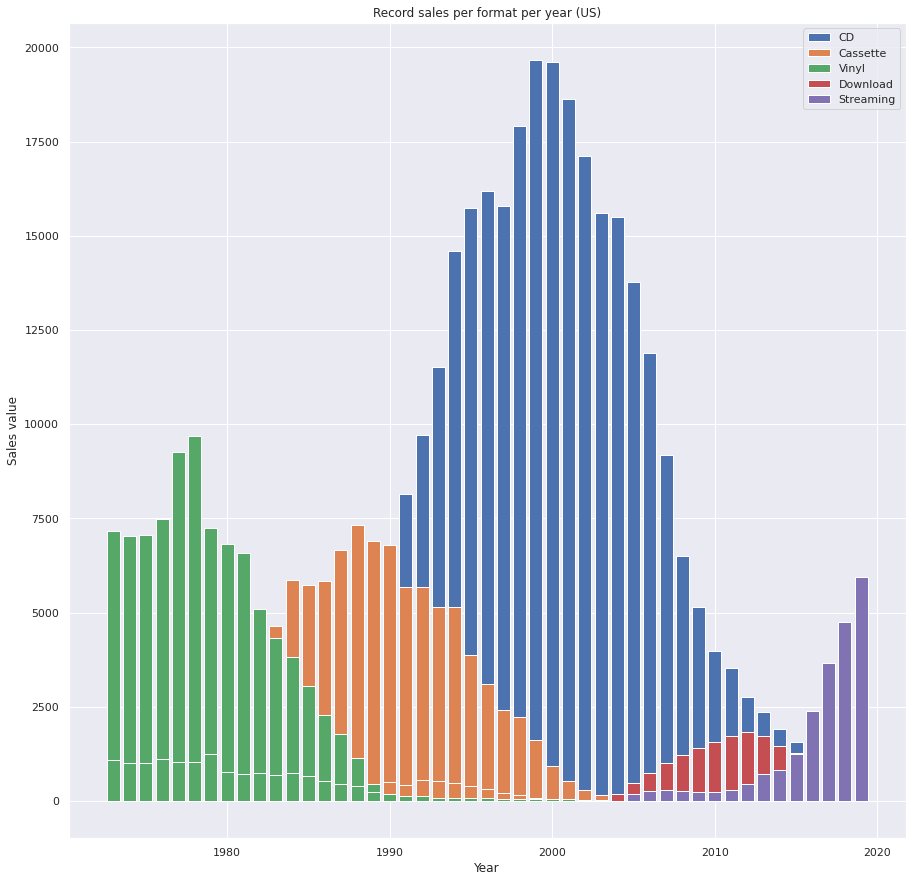

In [38]:
#Let's plot!
fig,ax = plt.subplots(figsize=(15,15))
for i in new_df.format.unique():
    ax.bar(new_df[(new_df.format == i) & (new_df.metric == "Value (Adjusted)")]["year"], new_df[(new_df.format == i) & (new_df.metric == "Value (Adjusted)")]["value_actual"], label = i)
ax.set_xlabel('Year')
ax.set_ylabel('Sales value')
ax.set_title('Record sales per format per year (US)')
ax.legend()
plt.show()

While there seems to be some missing data in the 2010s, as not all sales are made by streaming, this graph shows beautifully the rise & fall of the different formats over time. It also tells the story of the music industry heavily struggling withz the advent of the internet and streaming being a heavy factor in it recovering.

